# importing Neccesary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv('C:/Users/pcd/Desktop/datasets/cleveland.csv')
data2=data

# Data Analysis

In [96]:
data.head(5)



,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   tresbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.corr()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.306146,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.111921,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.202568,-0.161736,0.433798
tresbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.102163,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.090746,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.151028,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.090340,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.234810,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.132526,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.246335,0.210244,-0.430696


In [6]:
data.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.712871,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.979965,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:

data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# performing visualization of the dataset

<AxesSubplot:xlabel='tresbps', ylabel='count'>

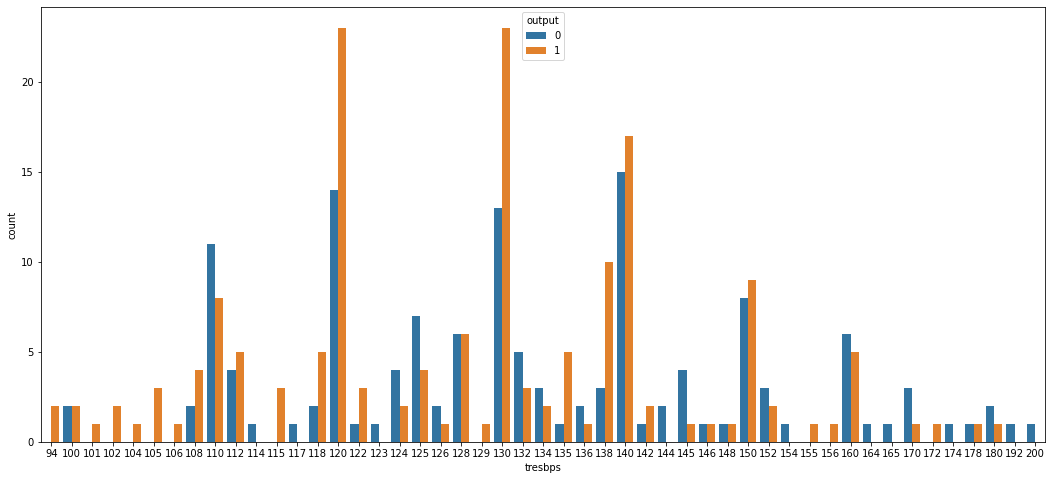

In [8]:
plt.figure(figsize=(18,8))
sns.countplot('tresbps',hue='output',data=data)

<Figure size 864x864 with 0 Axes>

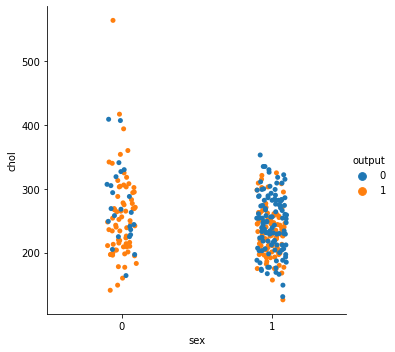

In [9]:
plt.figure(figsize=(12,12))
sns.catplot(x='sex',y='chol',hue='output',data=data,kind='strip')

<AxesSubplot:xlabel='age'>

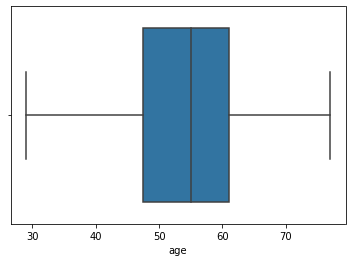

In [10]:
sns.boxplot('age',data=data)

<AxesSubplot:xlabel='slope'>

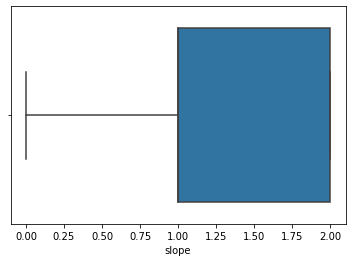

In [11]:
sns.boxplot('slope',data=data)

<AxesSubplot:xlabel='chol'>

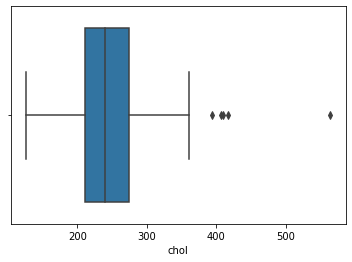

In [12]:
sns.boxplot('chol',data=data)

<AxesSubplot:xlabel='ca'>

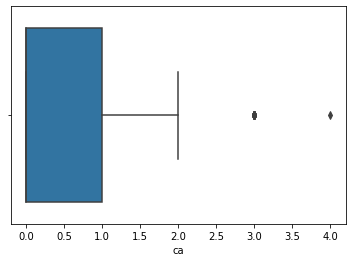

In [13]:
sns.boxplot('ca',data=data)

<AxesSubplot:xlabel='tresbps'>

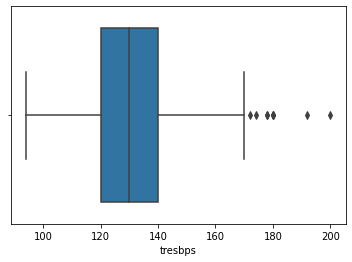

In [14]:
sns.boxplot('tresbps',data=data)

<AxesSubplot:xlabel='restecg'>

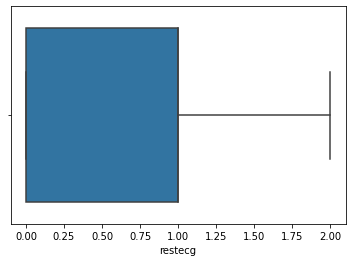

In [15]:
sns.boxplot('restecg',data=data)

<AxesSubplot:xlabel='thalach'>

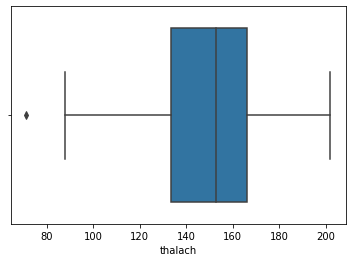

In [16]:
sns.boxplot('thalach',data=data)

<AxesSubplot:xlabel='exang'>

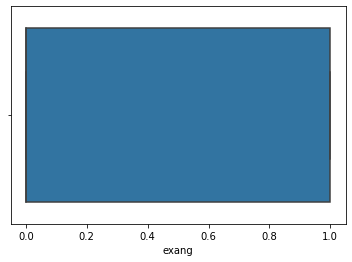

In [17]:
sns.boxplot('exang',data=data)

<AxesSubplot:xlabel='oldpeak'>

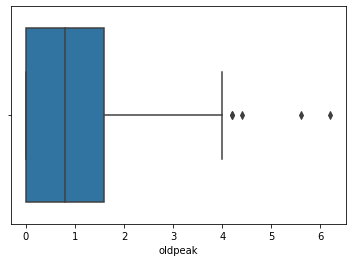

In [18]:
sns.boxplot('oldpeak',data=data)

<AxesSubplot:xlabel='thal'>

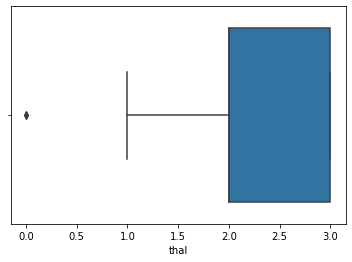

In [19]:
sns.boxplot('thal',data=data)

<AxesSubplot:xlabel='fbs'>

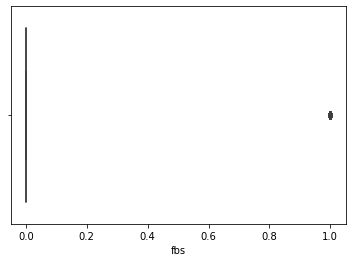

In [20]:
sns.boxplot('fbs',data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'tresbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>]],
      dtype=object)

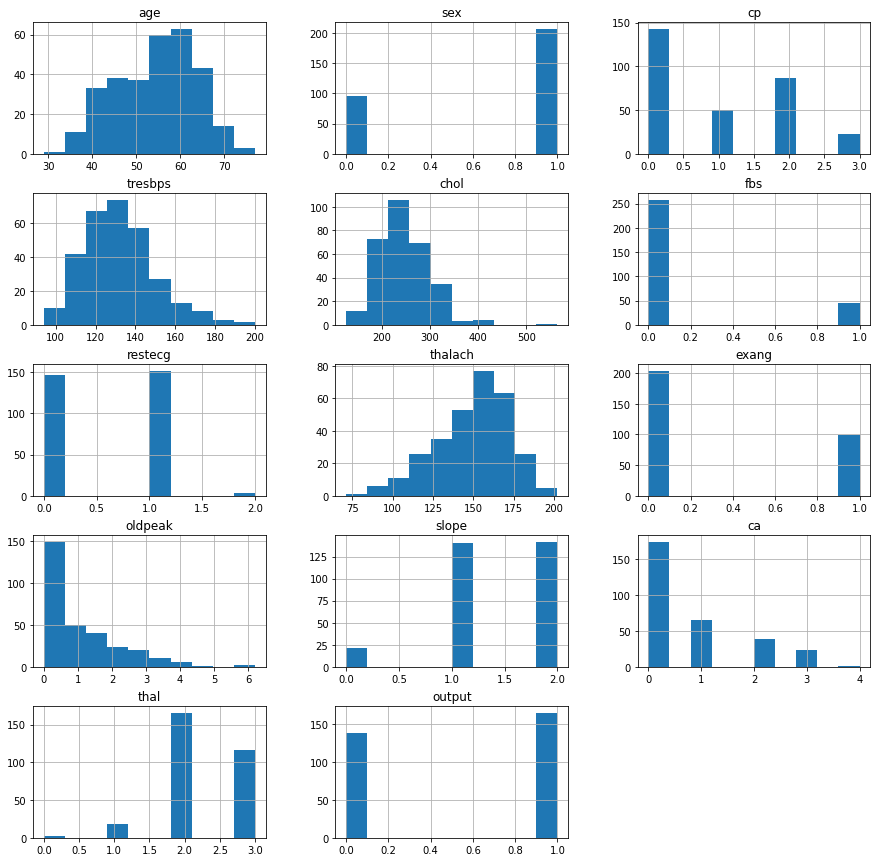

In [21]:
data.hist(figsize=(15,15),layout=(5,3))

<AxesSubplot:xlabel='fbs', ylabel='count'>

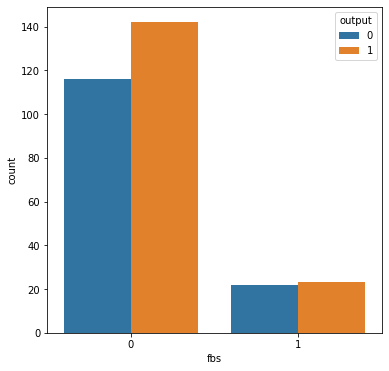

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('fbs',data=data,hue='output')

<AxesSubplot:xlabel='exang', ylabel='thalach'>

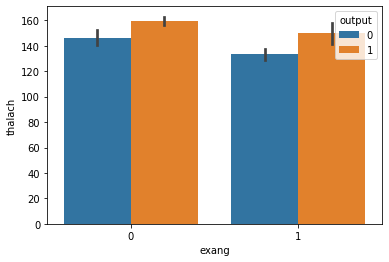

In [23]:
sns.barplot('exang','thalach',hue='output',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

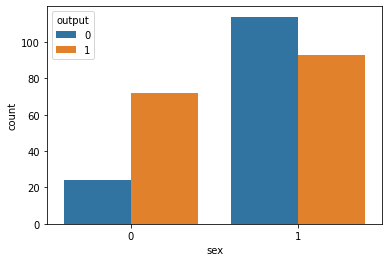

In [24]:
sns.countplot(x='sex',hue='output',data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

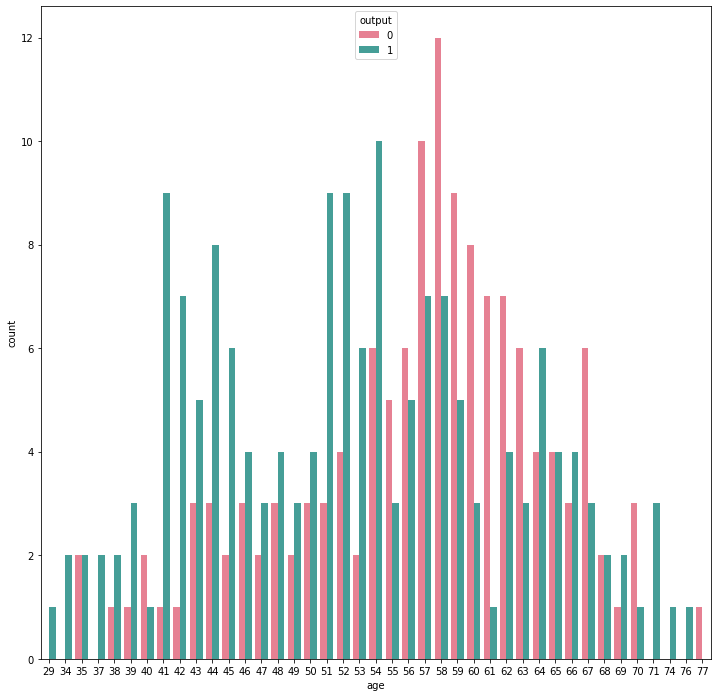

In [25]:
plt.figure(figsize=(12,12))
sns.countplot( x='age',hue='output',data=data,palette='husl')



<AxesSubplot:>

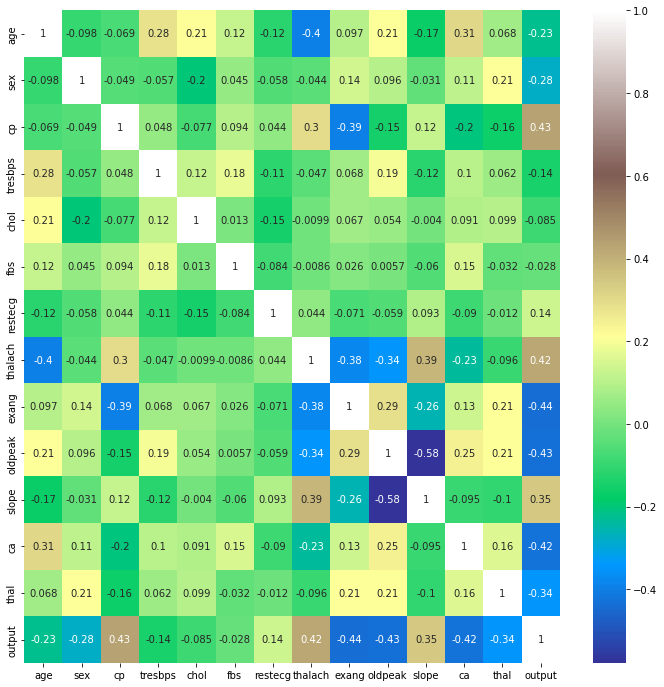

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='terrain')

<AxesSubplot:xlabel='sex', ylabel='age'>

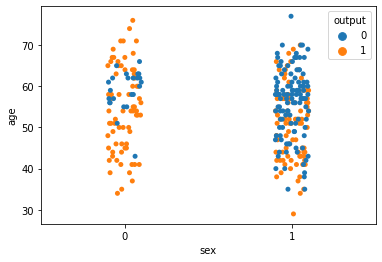

In [27]:
sns.stripplot(x='sex',y='age',hue='output',data=data)


# data Splitting 

In [28]:
#independent Variables
x=data.iloc[:,:-1].values
#Dependent Variables
y=data.iloc[:,-1].values



In [29]:
#performing feature scaling using standardscaler

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
m=mlp.fit(x_train,y_train)
mlp_ac_1=mlp.score(x_test,y_test)
y_pred_mlp=mlp.predict(x_test)
print(y_pred_mlp)
cm=confusion_matrix(y_test,y_pred_mlp)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of ANN:',mlp_ac_1)


[1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1]
CONFUSSION MATRIX
 [[18  8]
 [ 5 30]]
Accuracy of ANN: 0.7868852459016393


In [32]:
nc=KNeighborsClassifier(n_neighbors=5)
k=nc.fit(x_train,y_train)
nc_ac_1=nc.score(x_test,y_test)
y_pred_knn=nc.predict(x_test)
print(y_pred_knn)
cm=confusion_matrix(y_test,y_pred_knn)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of KNN:',nc_ac_1)

[1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1]
CONFUSSION MATRIX
 [[21  5]
 [ 3 32]]
Accuracy of KNN: 0.8688524590163934


In [33]:
svm=SVC(kernel='linear')
s=svm.fit(x_train,y_train)
svm_ac_1=svm.score(x_test,y_test)
y_pred_svm=svm.predict(x_test)
print(y_pred_svm)
cm=confusion_matrix(y_test,y_pred_svm)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of SVM:',svm_ac_1)


[0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1]
CONFUSSION MATRIX
 [[21  5]
 [ 2 33]]
Accuracy of SVM: 0.8852459016393442


In [34]:
lr=LogisticRegression(C=1)
l=lr.fit(x_train,y_train)
lr_ac_1=lr.score(x_test,y_test)
y_pred_lr=lr.predict(x_test)
print(y_pred_lr)
cm=confusion_matrix(y_test,y_pred_lr)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of LR:',lr_ac_1)

[1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1]
CONFUSSION MATRIX
 [[21  5]
 [ 1 34]]
Accuracy of LR: 0.9016393442622951


In [35]:
sgd=SGDClassifier()
sg=sgd.fit(x_train,y_train)
sgd_ac_1=sgd.score(x_test,y_test)
y_pred_sgd=sgd.predict(x_test)
cm=confusion_matrix(y_test,y_pred_sgd)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of SGD:',sgd_ac_1)

CONFUSSION MATRIX
 [[22  4]
 [ 4 31]]
Accuracy of SGD: 0.8688524590163934


In [36]:
nb=GaussianNB()
n=nb.fit(x_train,y_train)
nb_ac_1=nb.score(x_test,y_test)
y_pred_nb=nb.predict(x_test)
print(y_pred_nb)
cm=confusion_matrix(y_test,y_pred_nb)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of NB:',nb_ac_1)

[1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1]
CONFUSSION MATRIX
 [[22  4]
 [ 5 30]]
Accuracy of NB: 0.8524590163934426


In [37]:
dt=DecisionTreeClassifier()
d=dt.fit(x_train,y_train)
dt_ac_1=dt.score(x_test,y_test)
y_pred_dt=dt.predict(x_test)
print(y_pred_dt)
cm=confusion_matrix(y_test,y_pred_dt)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of DT:',dt_ac_1)

[0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1]
CONFUSSION MATRIX
 [[21  5]
 [12 23]]
Accuracy of DT: 0.7213114754098361


In [38]:
rf=RandomForestClassifier(100)
r=rf.fit(x_train,y_train)
rf_ac_1=rf.score(x_test,y_test)
y_pred_rf=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred_rf)
print('CONFUSSION MATRIX\n',cm)
print('Accuracy of RF:',rf_ac_1)

CONFUSSION MATRIX
 [[21  5]
 [ 3 32]]
Accuracy of RF: 0.8688524590163934


In [134]:
print('-----------------ACCURACY OF MODELS----------------')
print('Accurracy using ANN Model:',round(mlp_ac_1,3))
print('Accurracy using KNN Model:',round(nc_ac_1,3))
print('Accurracy using SVM Model:',round(svm_ac_1,3))
print('Accurracy using LOGISTIC REGRESSION Model:',round(lr_ac_1,3))
print('Accurracy using SGD CLASSIFIER  Model:',round(sgd_ac_1,3))
print('Accurracy using N_BAYES Model:',round(nb_ac_1,3))
print('Accurracy using D TREE Model:',round(dt_ac_1,3))
print('Accurracy using R FOREST Model:',round (rf_ac_1,3))

-----------------ACCURACY OF MODELS----------------
Accurracy using ANN Model: 0.787
Accurracy using KNN Model: 0.869
Accurracy using SVM Model: 0.885
Accurracy using LOGISTIC REGRESSION Model: 0.902
Accurracy using SGD CLASSIFIER  Model: 0.869
Accurracy using N_BAYES Model: 0.852
Accurracy using D TREE Model: 0.721
Accurracy using R FOREST Model: 0.869


# improving Accuracy Using Hyperparameters on some models

In [40]:
#estimator().get_params().keys()

In [41]:
mlp_p={
    'hidden_layer_sizes':[(10,10,10),(20,20,20),(50,50,50)],
    'activation':['tanh','relu'],
    'solver':['sgd','adam'],
    'learning_rate':['constant','adaptive']
}

grid_mlp=GridSearchCV(MLPClassifier(max_iter=1000),mlp_p,cv=10,n_jobs=-1)
grid_mlp.fit(x_train,y_train)
print('Accuracy of Artificial NeuralNetwork:',str(grid_mlp.score(x_test,y_test)))

Accuracy of Artificial NeuralNetwork: 0.8360655737704918


In [42]:
knn_p={
    'leaf_size':[x for x in range(1,50)],
    'n_neighbors':[x for x in range(1,30)],
     'p':[1,2]
}
grid_knn=GridSearchCV(KNeighborsClassifier(),knn_p,cv=10,n_jobs=-1)
grid_knn.fit(x_train,y_train)
print('Accuracy of KNN:',str(grid_knn.score(x_test,y_test)))


Accuracy of KNN: 0.8688524590163934


In [43]:
svm_p={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'gamma':[0.001,0.01,0.1,1,10,100,1000],
    'kernel':['linear','poly','rbf','sigmoid']
    
}
grid_svm=GridSearchCV(SVC(random_state=0),svm_p,cv=10,n_jobs=-1)
grid_svm.fit(x_train,y_train)
print('Accuracy of SVM:',str(grid_svm.score(x_test,y_test)))



Accuracy of SVM: 0.8852459016393442


In [44]:
dt_p={
  'splitter':['best','random'],
    'max_depth':[1,3,5,6,10],
    'min_samples_leaf':[1,2,3,6,8,9,10],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.6,0.9],
    'max_features':['auto','log2','sqrt',None]
}
grid_dt=GridSearchCV(DecisionTreeClassifier(),dt_p,cv=10,n_jobs=-1)
grid_dt.fit(x_train,y_train)
print('Accuracy of Decision Tree Model:',str(grid_dt.score(x_test,y_test)))



Accuracy of Decision Tree Model: 0.8032786885245902


In [55]:
print('Accuracy of Artificial NeuralNetwork:',str(grid_mlp.score(x_test,y_test)))
print('Accuracy of KNN:',str(grid_knn.score(x_test,y_test)))
print('Accuracy of SVM:',str(grid_svm.score(x_test,y_test)))
print('Accuracy of Decision Tree Model:',str(grid_dt.score(x_test,y_test)))
print('Accuracy of LR:',str(lr.score(x_test,y_test)))
print('Accuracy of SGD:',str(sgd.score(x_test,y_test)))
print('Accuracy of NB:',str(nb.score(x_test,y_test)))
print('Accuracy of RF:',str(rf.score(x_test,y_test)))


Accuracy of Artificial NeuralNetwork: 0.8360655737704918
Accuracy of KNN: 0.8688524590163934
Accuracy of SVM: 0.8852459016393442
Accuracy of Decision Tree Model: 0.8032786885245902
Accuracy of LR: 0.9016393442622951
Accuracy of SGD: 0.8688524590163934
Accuracy of NB: 0.8524590163934426
Accuracy of RF: 0.8688524590163934


#cross validating our data to check for best model for our unseen data to be used in our system.

In [56]:
y_pred_mlp=grid_mlp.predict(x_test)
y_pred_mknn=grid_knn.predict(x_test)
y_pred_svm=grid_svm.predict(x_test)
y_pred_dt=grid_dt.predict(x_test)
print('accuracy using ROC SCORE FOR ANN:',roc_auc_score(y_test,y_pred_mlp))
print('accuracy using ROC SCORE FOR KNN:',roc_auc_score(y_test,y_pred_knn))
print('accuracy using ROC SCORE FOR SVM:',roc_auc_score(y_test,y_pred_svm))
print('accuracy using ROC SCORE FOR LR:',roc_auc_score(y_test,y_pred_lr))
print('accuracy using ROC SCORE FOR SGD:',roc_auc_score(y_test,y_pred_sgd))
print('accuracy using ROC SCORE FOR NB:',roc_auc_score(y_test,y_pred_nb))
print('accuracy using ROC SCORE FOR DT:',roc_auc_score(y_test,y_pred_dt))
print('accuracy using ROC SCORE FOR RF:',roc_auc_score(y_test,y_pred_rf))

accuracy using ROC SCORE FOR ANN: 0.8274725274725273
accuracy using ROC SCORE FOR KNN: 0.8609890109890109
accuracy using ROC SCORE FOR SVM: 0.8703296703296703
accuracy using ROC SCORE FOR LR: 0.8895604395604396
accuracy using ROC SCORE FOR SGD: 0.8659340659340659
accuracy using ROC SCORE FOR NB: 0.8516483516483516
accuracy using ROC SCORE FOR DT: 0.798901098901099
accuracy using ROC SCORE FOR RF: 0.8274725274725273


In [57]:
print('classification report for ANN\n',classification_report(y_test,y_pred_mlp))
print('classification report for KNN\n',classification_report(y_test,y_pred_knn))
print('classification report for SVM\n',classification_report(y_test,y_pred_svm))
print('classification report for LR\n',classification_report(y_test,y_pred_lr))
print('classification report for SGD\n',classification_report(y_test,y_pred_sgd))
print('classification report for NB\n',classification_report(y_test,y_pred_nb))
print('classification report for DT\n',classification_report(y_test,y_pred_dt))
print('classification report for RF\n',classification_report(y_test,y_pred_rf))

classification report for ANN
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

classification report for KNN
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.86      0.91      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

classification report for SVM
               precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.85      0.97      0.91        35

    accuracy                           0.89        61
   macro avg       0.90      0.87  

In [133]:
models=[lr,mlp,grid_svm.best_estimator_,nb,sgd,grid_dt.best_estimator_,rf,grid_knn.best_estimator_]
for model in models:
    kFold=StratifiedKFold(n_splits=3)
    cvs=cross_val_score(model,x_train,y_train,cv=kFold,scoring='accuracy')
    model=str(model).split('(')
    model=model[0]
    print(model,':',round(cvs.mean(),3))

LogisticRegression : 0.818
MLPClassifier : 0.765
SVC : 0.843
GaussianNB : 0.806
SGDClassifier : 0.802
DecisionTreeClassifier : 0.711
RandomForestClassifier : 0.806
KNeighborsClassifier : 0.835
